In [2]:
from hangman import hangman, get_dictionary

Posterior array shape: (10000, 4)
First few samples:
[[0.19031279 0.14086328 0.41243058 0.25639335]
 [0.19031279 0.14086328 0.41243058 0.25639335]
 [0.19031279 0.14086328 0.41243058 0.25639335]
 [0.19031279 0.14086328 0.41243058 0.25639335]
 [0.21117772 0.0466719  0.45764737 0.28450301]]


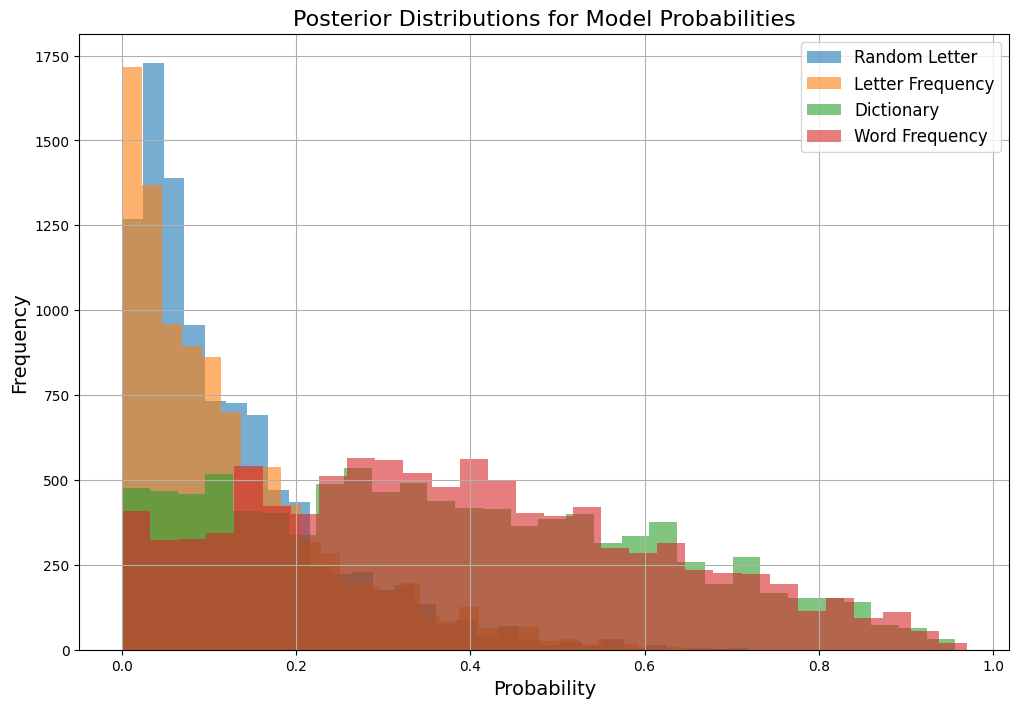

Mean values for each model:
Random Letter: 0.12158935872929255
Letter Frequency: 0.12651850854084454
Dictionary: 0.3705517012997669
Word Frequency: 0.38134043143009594


In [41]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the posterior data from the JSON file
with open('webppl-model/posterior.json', 'r') as f:
    posterior_data = json.load(f)


# Extract posterior samples (list of "value" arrays)
posterior_samples = [sample['value'] for sample in posterior_data['posteriorSamples']]

# Step 2: Convert samples into a NumPy array for easier manipulation
posterior_array = np.array(posterior_samples)  # Shape: (num_samples, 4)

# Check the shape and structure of the data for debugging
print(f"Posterior array shape: {posterior_array.shape}")
print(f"First few samples:\n{posterior_array[:5]}")

# Step 3: Plot histograms for each model's posterior probabilities
model_labels = ["Random Letter", "Letter Frequency", "Dictionary", "Word Frequency"]
plt.figure(figsize=(12, 8))

for i in range(posterior_array.shape[1]):  # Iterate over the 4 models
    plt.hist(
        posterior_array[:, i], 
        bins=30, 
        alpha=0.6, 
        label=f"{model_labels[i]}"
    )

# Configure plot settings
plt.title("Posterior Distributions for Model Probabilities", fontsize=16)
plt.xlabel("Probability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#print mean values
print("Mean values for each model:")
for i in range(posterior_array.shape[1]):
    print(f"{model_labels[i]}: {np.mean(posterior_array[:, i])}")
mean_values = np.mean(posterior_array, axis=0)


In [43]:
print(mean_values)
weights = {
    1: [0.08859492, 0.40133684, 0.31243508, 0.19763316],
    2: [0.11605114, 0.38621881, 0.23936726, 0.2583628 ],
    3: [0.12186219, 0.28665384, 0.31284495, 0.27863902],
    4: [0.10330926, 0.25058945, 0.42320329, 0.222898],
    5: [0.09492762, 0.31013833, 0.31059382, 0.28434024],
    6: [0.18799401, 0.29766112, 0.2677387, 0.24660617],
    7: [0.16395157, 0.28242938, 0.34735125, 0.2062678 ],
    8: [0.14860061, 0.43979499, 0.17942288, 0.23218152],
    9: [0.2401632,  0.31160377, 0.21896207, 0.22927096],
    10: [0.12976908, 0.14124143, 0.32569374, 0.40329575],
    11: [0.11474208, 0.12697441, 0.34043188, 0.41785163],
    12: [0.12158936, 0.12651851, 0.3705517, 0.38134043],
    
    
    
}


chance_smart = []
for i in range(1, len(weights)):
    chance_smart.append(weights[i][2]+weights[i][3])
print("chance smart", chance_smart)

[0.12158936 0.12651851 0.3705517  0.38134043]
change smart [0.51006824, 0.49773006, 0.5914839700000001, 0.64610129, 0.59493406, 0.51434487, 0.55361905, 0.4116044, 0.44823303000000003, 0.72898949, 0.75828351]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


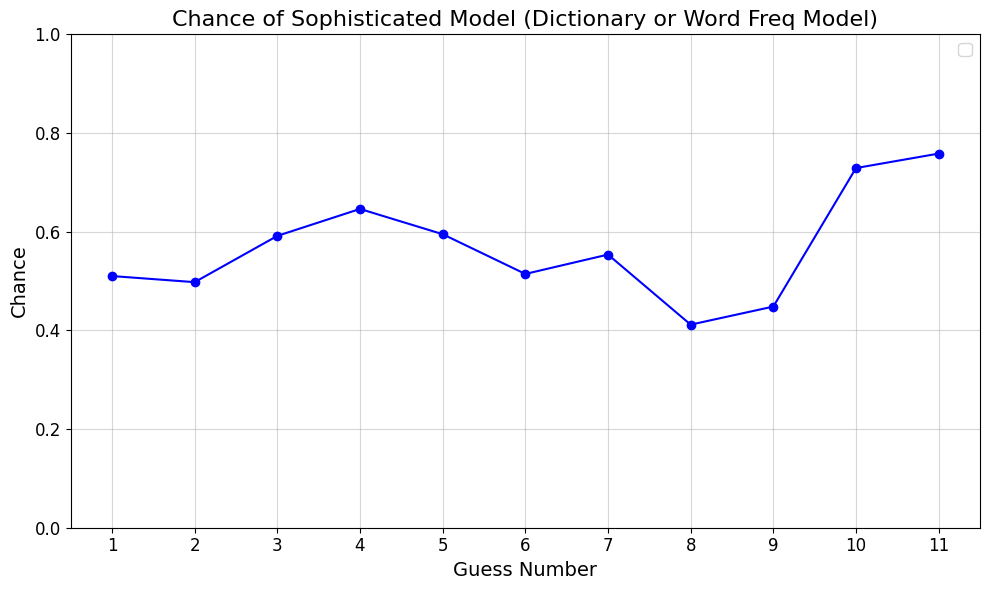

In [51]:
#make a graph of chance_smart
# change smart [0.51006824, 0.49773006, 0.5914839700000001, 0.64610129, 0.59493406, 0.51434487, 0.55361905, 0.4116044, 0.44823303000000003, 0.72898949, 0.75828351]
steps = np.arange(1, len(chance_smart) + 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(steps, chance_smart, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title("Chance of Sophisticated Model (Dictionary or Word Freq Model)", fontsize=16)
plt.xlabel("Guess Number", fontsize=14)
plt.ylabel("Chance", fontsize=14)

# Customize ticks
plt.xticks(steps, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
# Add grid and legend
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


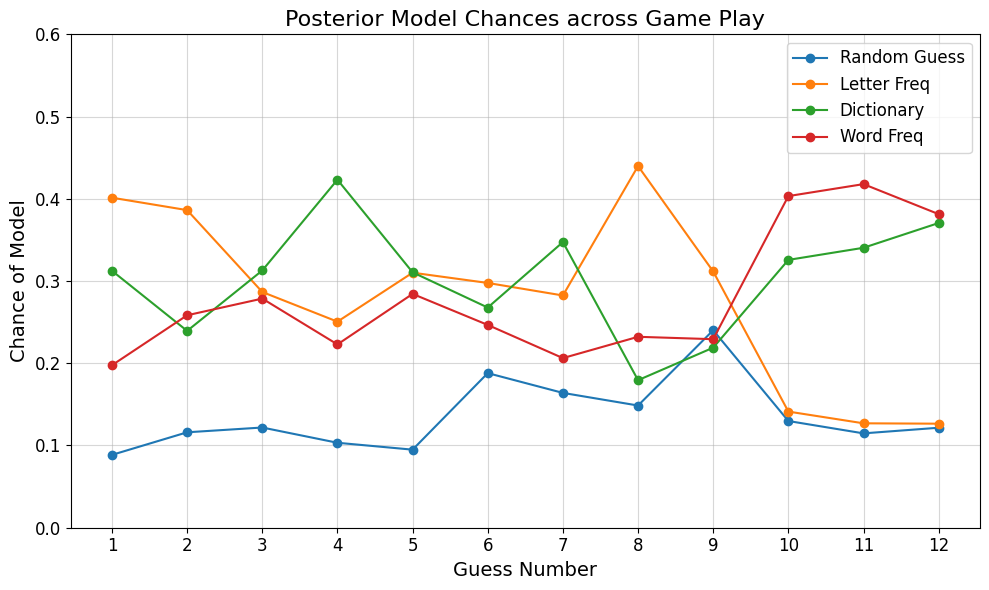

In [58]:
weights_array = np.array(list(weights.values()))  # Shape: (steps, models)
steps = np.arange(1, weights_array.shape[0] + 1)  # Step numbers

# Model labels
model_labels = ["Random Guess", "Letter Freq", "Dictionary", "Word Freq"]

# Plot each model's chances over the steps
plt.figure(figsize=(10, 6))
for model_idx in range(weights_array.shape[1]):
    plt.plot(steps, weights_array[:, model_idx], marker='o', label=model_labels[model_idx])

# Add titles and labels
plt.title("Posterior Model Chances across Game Play", fontsize=16)
plt.xlabel("Guess Number", fontsize=14)
plt.ylabel("Chance of Model", fontsize=14)

# Add grid, legend, and display the plot
plt.xticks(steps, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 0.6)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
successful_mean_values = [0.0336722,  0.06968473, 0.58334843, 0.31329463] #from a 10000 run 
unsuccessful_mean_values = [0.14220604, 0.75107734, 0.06937075, 0.03734587]

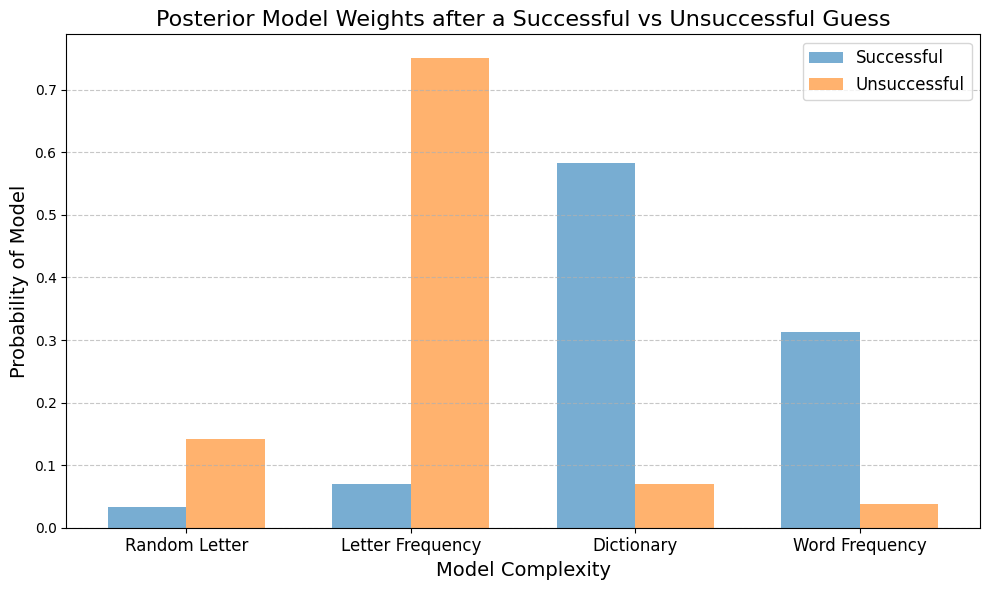

In [6]:

# Width of the bars
bar_width = 0.35
x = np.arange(len(model_labels))  # x positions for groups

plt.figure(figsize=(10, 6))

# Bar plot for successful values
plt.bar(x - bar_width/2, successful_mean_values, width=bar_width, label="Successful", alpha=0.6)

# Bar plot for unsuccessful values
plt.bar(x + bar_width/2, unsuccessful_mean_values, width=bar_width, label="Unsuccessful", alpha=0.6)

# Titles and labels
plt.title("Posterior Model Weights after a Successful vs Unsuccessful Guess", fontsize=16)
plt.ylabel("Probability of Model", fontsize=14)
plt.xlabel("Model Complexity", fontsize=14)

# Ticks and legend
plt.xticks(x, model_labels, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
big_dictionary = get_dictionary("words.txt")

{'partial': ['_', '_', '_', '_', '_', '_', '_', '_'], 'not_in': set(), 'in': set()}
Guess:  e


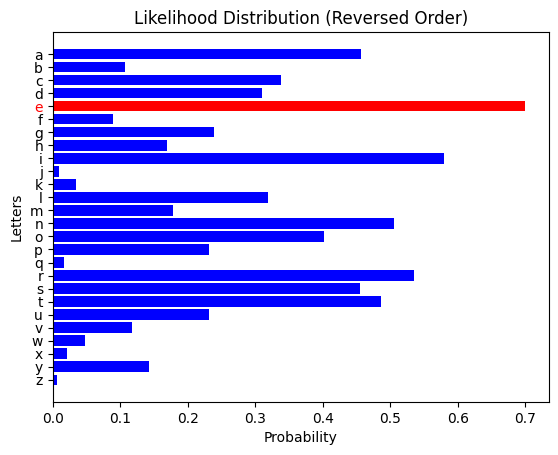

{'partial': ['_', '_', '_', '_', '_', '_', '_', '_'], 'not_in': {'e'}, 'in': set()}
Guess:  d


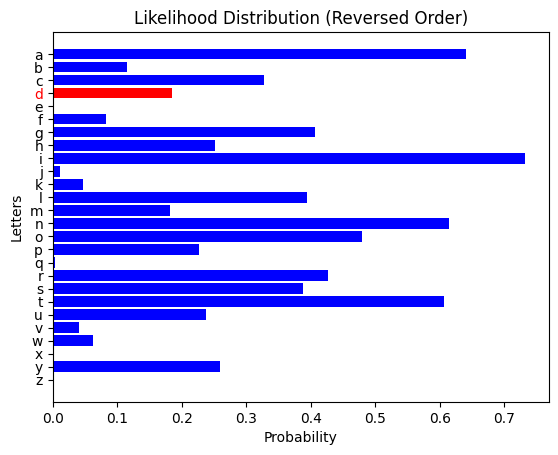

{'partial': ['_', '_', '_', '_', '_', '_', '_', '_'], 'not_in': {'e', 'd'}, 'in': set()}
Guess:  a


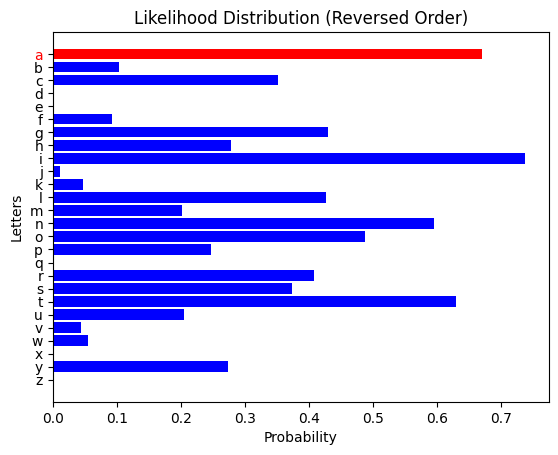

{'partial': ['_', '_', 'a', '_', '_', '_', '_', '_'], 'not_in': {'e', 'd'}, 'in': {'a'}}
Guess:  t


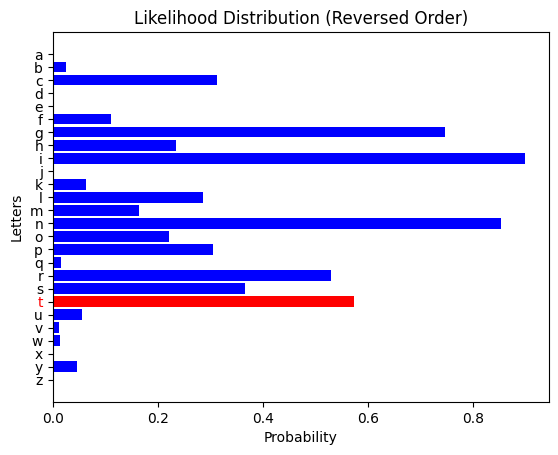

{'partial': ['_', '_', 'a', '_', '_', '_', '_', '_'], 'not_in': {'e', 'd', 't'}, 'in': {'a'}}
Guess:  s


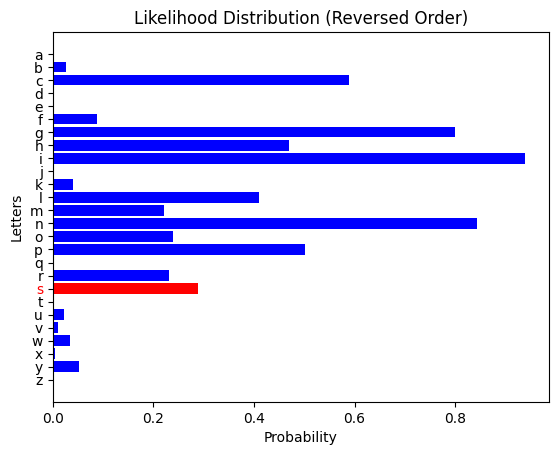

{'partial': ['_', '_', 'a', '_', '_', '_', '_', '_'], 'not_in': {'e', 'd', 's', 't'}, 'in': {'a'}}
Guess:  i


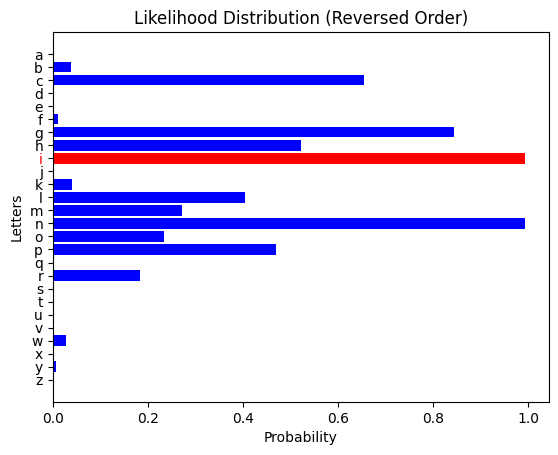

{'partial': ['_', '_', 'a', '_', 'i', '_', '_', '_'], 'not_in': {'e', 'd', 's', 't'}, 'in': {'a', 'i'}}
Guess:  c


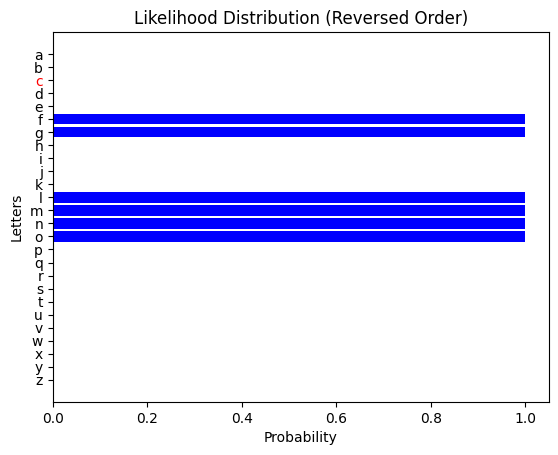

{'partial': ['_', '_', 'a', '_', 'i', '_', '_', '_'], 'not_in': {'t', 'c', 'e', 'd', 's'}, 'in': {'a', 'i'}}
Guess:  h


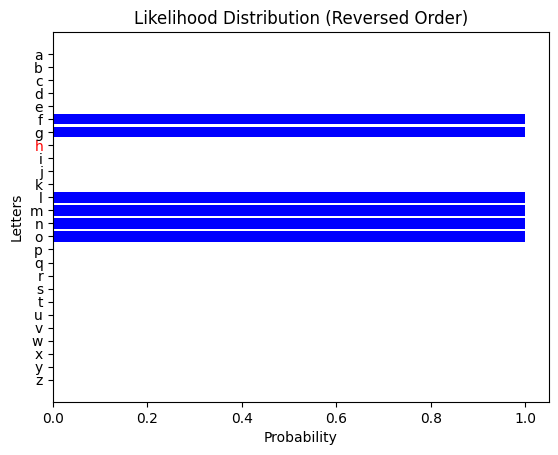

{'partial': ['_', '_', 'a', '_', 'i', '_', '_', '_'], 'not_in': {'h', 't', 'c', 'e', 'd', 's'}, 'in': {'a', 'i'}}
Guess:  n


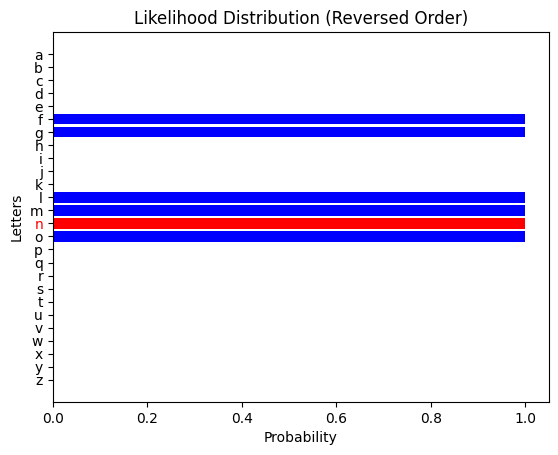

{'partial': ['_', '_', 'a', '_', 'i', 'n', '_', '_'], 'not_in': {'h', 't', 'c', 'e', 'd', 's'}, 'in': {'n', 'a', 'i'}}
Guess:  g


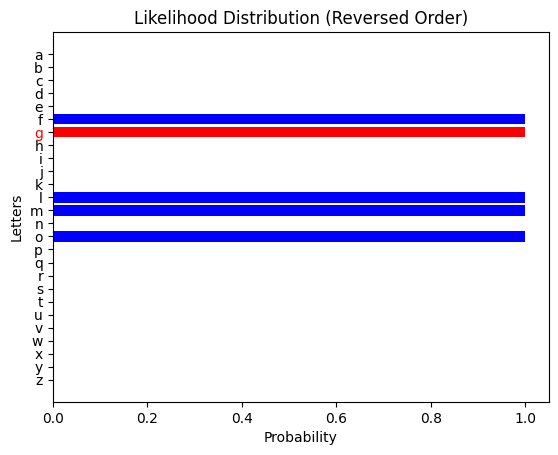

{'partial': ['_', '_', 'a', '_', 'i', 'n', 'g', '_'], 'not_in': {'h', 't', 'c', 'e', 'd', 's'}, 'in': {'g', 'n', 'a', 'i'}}
Guess:  y


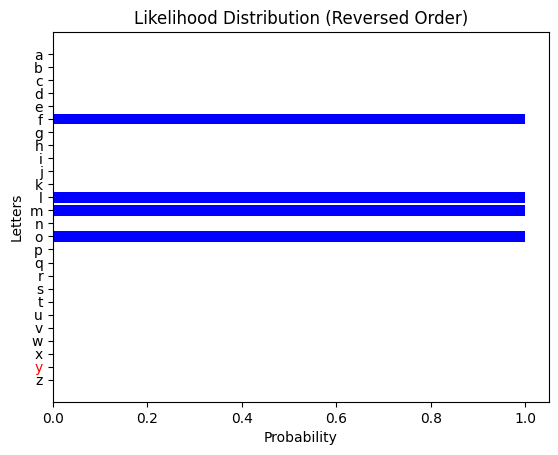

{'partial': ['_', '_', 'a', '_', 'i', 'n', 'g', '_'], 'not_in': {'h', 't', 'y', 'c', 'e', 'd', 's'}, 'in': {'g', 'n', 'a', 'i'}}
Guess:  o


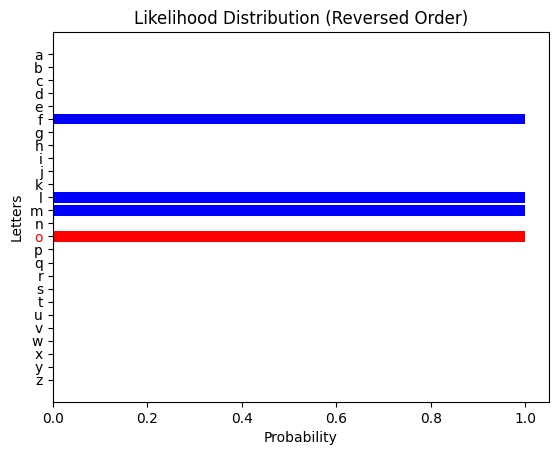

{'partial': ['_', '_', 'a', '_', 'i', 'n', 'g', 'o'], 'not_in': {'h', 't', 'y', 'c', 'e', 'd', 's'}, 'in': {'o', 'n', 'g', 'a', 'i'}}
Guess:  h


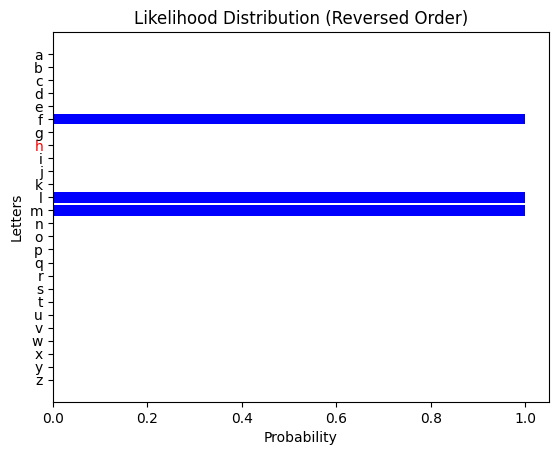

{'partial': ['_', '_', 'a', '_', 'i', 'n', 'g', 'o'], 'not_in': {'h', 't', 'y', 'c', 'e', 'd', 's'}, 'in': {'o', 'n', 'g', 'a', 'i'}}
Guess:  l


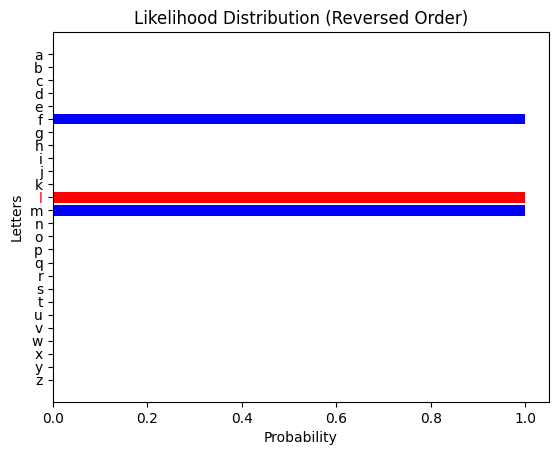

{'partial': ['_', 'l', 'a', '_', 'i', 'n', 'g', 'o'], 'not_in': {'h', 't', 'y', 'c', 'e', 'd', 's'}, 'in': {'o', 'l', 'n', 'g', 'a', 'i'}}
Guess:  f


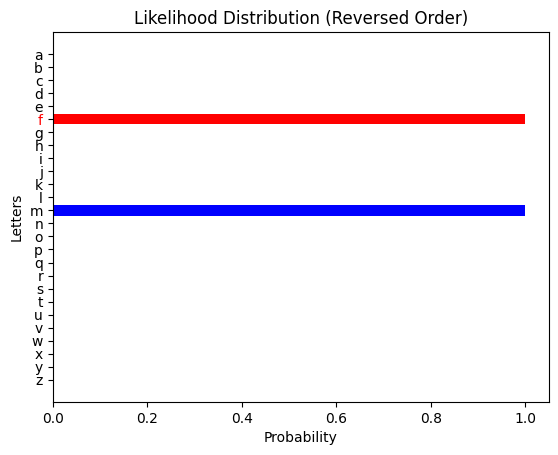

{'partial': ['f', 'l', 'a', '_', 'i', 'n', 'g', 'o'], 'not_in': {'h', 't', 'y', 'c', 'e', 'd', 's'}, 'in': {'o', 'l', 'n', 'f', 'g', 'a', 'i'}}
Guess:  m


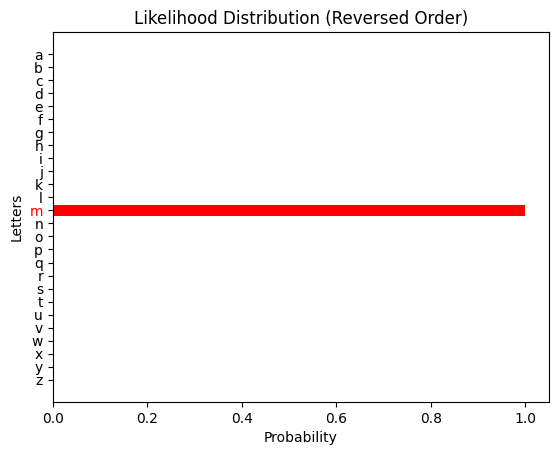

{'a': 0.0,
 'b': 0.0,
 'c': 0.0,
 'd': 0.0,
 'e': 0.0,
 'f': 0.0,
 'g': 0.0,
 'h': 0.0,
 'i': 0.0,
 'j': 0.0,
 'k': 0.0,
 'l': 0.0,
 'm': 1.0,
 'n': 0.0,
 'o': 0.0,
 'p': 0.0,
 'q': 0.0,
 'r': 0.0,
 's': 0.0,
 't': 0.0,
 'u': 0.0,
 'v': 0.0,
 'w': 0.0,
 'x': 0.0,
 'y': 0.0,
 'z': 0.0}

In [8]:
hangman(["f", "l", "a", "m", "i", "n", "g", "o"], ["e", "d", "a", "t", "s", "i", "c", "h", "n", "g", "y", "o", "h", "l", "f", "m"], big_dictionary, use_word_frequency = True)